# Adult Income Dataset

**Author:** Hai Hung Nguyen

**Date:** October 20, 2023

**Description:** This dataset is used to predict whether an individual earns more than $50,000 per year based on various features like age, work class, education level, marital status, occupation, and so on.

**Libraries and Dependencies:**
- pandas
- matplotlib
- numpy
- seaborn
- scikit-learn
- imbalanced-learn

**Sources:** This project is based on data from *UC Irvine*: https://archive.ics.uci.edu/dataset/2/adult

**Domain:** Demographics, Economics

**Task:** Exploratory Data Analysis, Data Cleaning, Feature Engineering, Model Training & Verification.


**Features:**  age, workclass, fnlwgt, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week,
native_country

**Target:** income


## 1. Data Description
<br>

### 1.1. Data and Packages Loading

In [1]:
# Packages importing: 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Column Name Adding:
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

# Train.data --> DataFrame train:
train_path = 'adult/adult.data'
train = pd.read_csv(train_path, names = column_names, header=None)

# Test.data --> DataFrame test_
test_path = 'adult/adult.test'
test = pd.read_csv(test_path, names= column_names, header=None)

This dataset is divided into two separate parts: one for model training, labeled as 'train.data,' and the other for validation, labeled as 'test.data.' 

These two parts are imported into the project as DataFrames named 'train' and 'test.'
 
Since neither of them contains headers, manual header addition is required.

### 1.2. Data Understanding

In [2]:
# Summary statistics from the DataFrame train
print(train.info())
print(test.info())
print(train.describe())
print(train.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns

This dataset is extracted from the 1994 U.S. Census database and used to predict *whether residents' income exceeds 50K/year*. Therefore **'income'** is designated as the **target** variable, while the remaining variables are considered **feature**. 

The 'train' DataFrame contains a total of 32,561 observations, and the 'test' DataFrame contains 16,282 observations. 

Both 'train' and 'test' DataFrames consist of 15 variables, all of which are non-null:. 

- 6 of them are integers: 'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', and 'hours_per_week'.
- 2 of them are binary: 'sex', and 'income'.
- 7 of them are categorical: 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', and 'native_country'.


**'age':** The age of the observation. E.g. 17, 50

**'workclass':** The category/type of the observation's employment. E.g. 'private', 'self-emp-not-inc', 'local-gov'

**'fnlwgt':** The serial number. 

**'education':** The highest level of education completed by the observation. E.g. 'pre-school', 'bachelor'

**'education_number':** Corresponding level of 'education', which is help to sort the education level ascending.

**'marital_status':** The marital status of the observation. E.g. 'married', 'divorced'

**'occupation':** Job that the observation is engaged in. E.g. 'tech-support', 'exec-managerial'

**'relationship':** The role of the observation in the household. E.g. 'husband', 'wife'

**'race':** The observation's race/ethnicity. E.g. 'white', 'black'

**'sex':** The gender of the observation. E.g. 'male', 'female'

**'capital_gain':** The profit of the observation from investment. E.g. 0, 1000

**'capital_loss':** The loss of the observation from investment. E.g. 0, 1000

**'hours_per_week':** The number of hours worked per week. E.g. 1, 40

**'native_country':** The citizenship of the observation. E.g. 'Mexico', 'Vietnam'

**'income':** The income of the observation. E.g. '>=50K', '>50K'



## 2. Exploratory Data Analysis
<br>
This section focuses on observing the distribution of each feature and their association with the target variable 'income'.

### 2.1. The distribution of 'age' and the association with the target variable 'income' 

<Figure size 640x480 with 0 Axes>

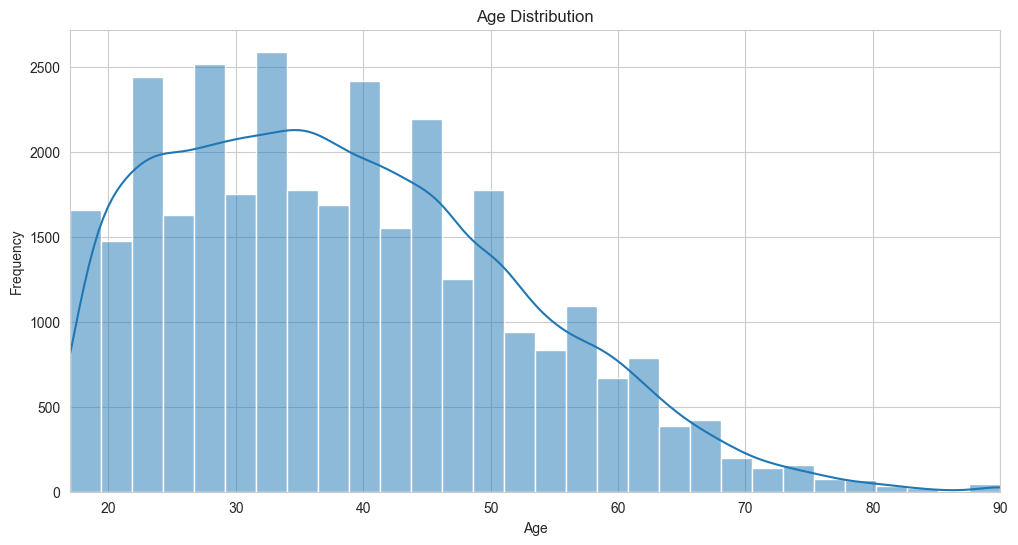

In [3]:
# Plot distribution of 'age'
plt.figure()
sns.set_style("whitegrid")
plt.subplots(figsize=(12, 6))
sns.histplot(train['age'], bins=30, kde=True)
plt.xlim(train['age'].min(),train['age'].max())
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

C:\Users\haihu\AppData\Local\Temp\ipykernel_16500\44624689.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(Grid_plot[0, 0])


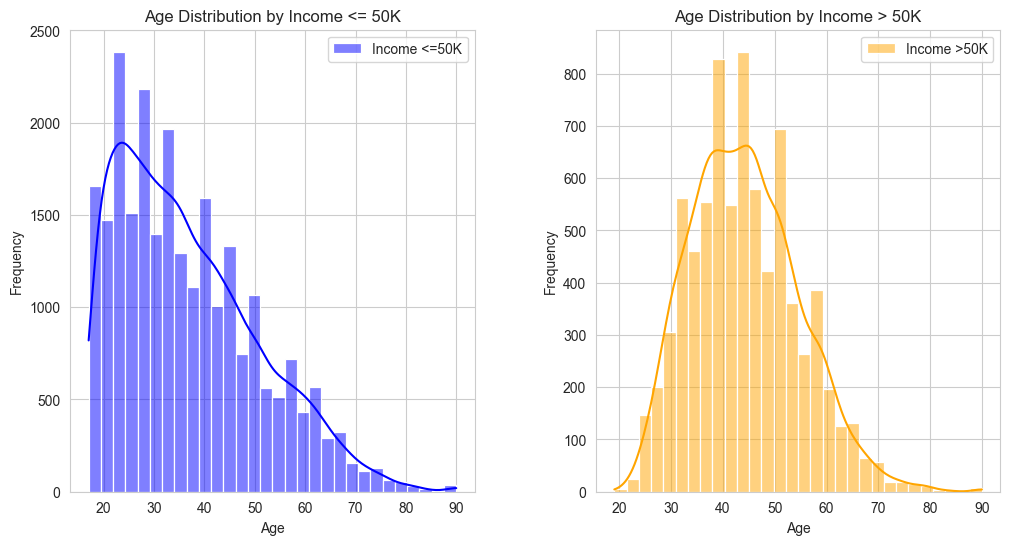

In [4]:
# Subplot 'age' vs. 'income'
# Filter income:
train['income'] = train['income'].str.strip()
income_gt_50k = train[train['income'] == '>50K']
income_le_50k = train[train['income'] == '<=50K']

# Set subplot
sns.set_style("whitegrid")
plt.subplots(figsize=(12, 6))
Grid_plot = plt.GridSpec(1, 2, wspace = 0.3)                         

# age vs income <= 50K on the left side
plt.subplot(Grid_plot[0, 0])
sns.histplot(income_le_50k['age'], bins=30, kde=True, color='blue', label='Income <=50K')
plt.title("Age Distribution by Income <= 50K")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()

# age vs income > 50K on the right side
plt.subplot(Grid_plot[0, 1])
sns.histplot(income_gt_50k['age'], bins=30, kde=True, color='orange', label='Income >50K')
plt.title("Age Distribution by Income > 50K")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()

The dataset exhibits a right-skewed age distribution, with a predominant concentration of individuals aged between 28 and 48 years. The average age within the dataset stands at 38 years, and notably, there is a limited representation of individuals aged 65 and older.

Regarding income, a substantial portion of young individuals between the ages of 17 and 30 earn an annual income of less than or equal to 50K. Conversely, those with annual incomes exceeding 50K are predominantly found within the age bracket of 35 to 40 years.

An apparent correlation exists between age and income within the dataset.

### 2.2. The distribution of 'capital_gain' & 'capital_loss' 

C:\Users\haihu\AppData\Local\Temp\ipykernel_16500\448657510.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(Grid_plot[0, 0])


Text(0, 0.5, 'Person')

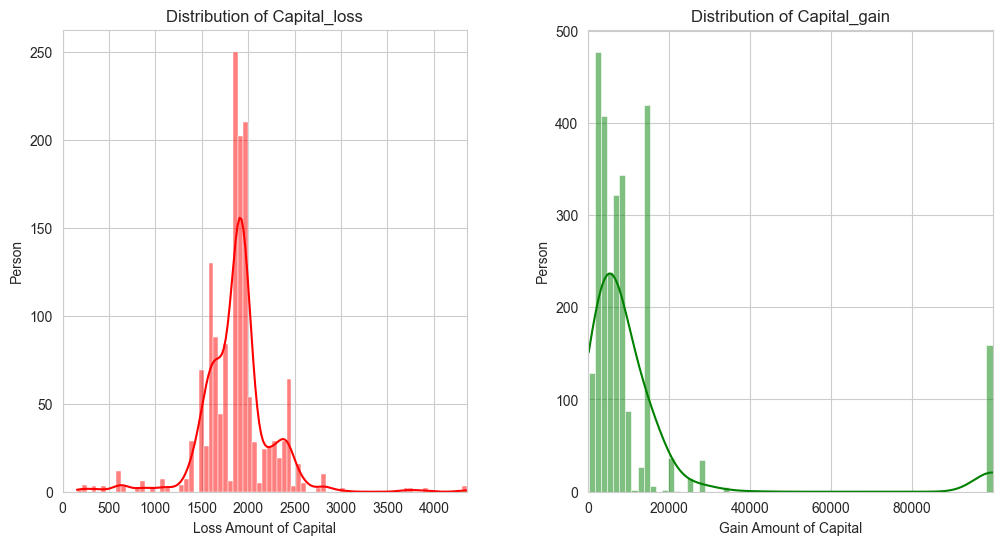

In [5]:
# Subplot 'capital_loss' & 'capital_gain'
# Set subplot
sns.set_style("whitegrid")
plt.subplots(figsize=(12, 6))
Grid_plot = plt.GridSpec(1, 2, wspace = 0.3)

# capital_loss on the left side
plt.subplot(Grid_plot[0, 0])
sns.histplot(train['capital_loss'][train['capital_loss']!=0], kde=True, color='red')
plt.xlim(0,train['capital_loss'].max())
plt.title("Distribution of Capital_loss")
plt.xlabel("Loss Amount of Capital")
plt.ylabel("Person")

# capital_gain on the right side
plt.subplot(Grid_plot[0, 1])
sns.histplot(train['capital_gain'][train['capital_gain']!=0], kde=True, color='green')
plt.xlim(0,train['capital_gain'].max())
plt.title("Distribution of Capital_gain")
plt.xlabel("Gain Amount of Capital")
plt.ylabel("Person")

Losses typically fall within the 1K to 3K range, whereas income predominantly concentrates within the 1K to 8K range.

It's evident that capital losses and captial gains have a direct impact on annual income.

### 2.3. The distribution of 'hours_per_week' and the association with the target variable 'income'

<Figure size 640x480 with 0 Axes>

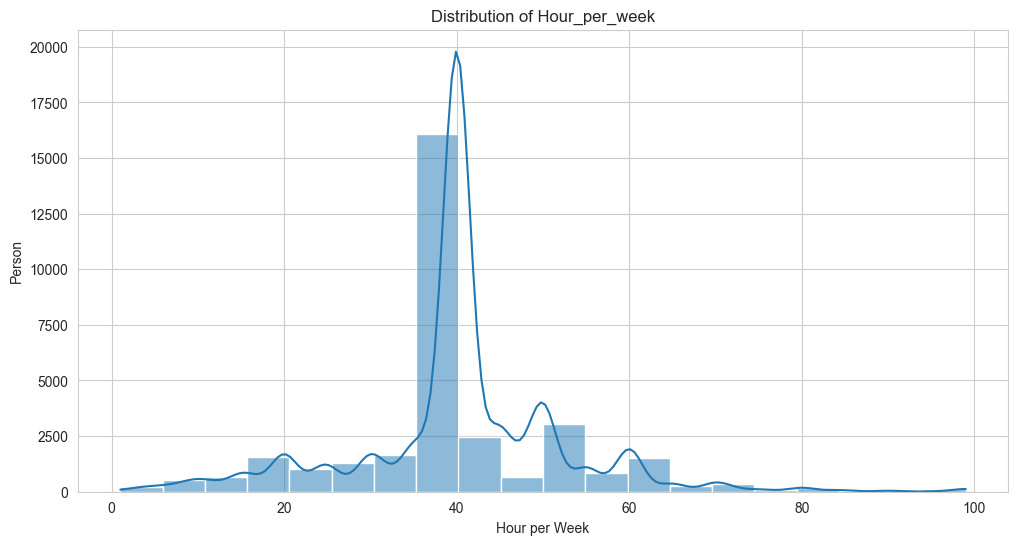

In [6]:
# Plot distribution of 'hours_per_week'
plt.figure()
sns.set_style("whitegrid")
plt.subplots(figsize=(12, 6))
sns.histplot(train['hours_per_week'], bins= 20, kde=True)
plt.title("Distribution of Hour_per_week")
plt.xlabel("Hour per Week")
plt.ylabel("Person")
plt.show()

C:\Users\haihu\AppData\Local\Temp\ipykernel_16500\4041644201.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(Grid_plot[0, 0])


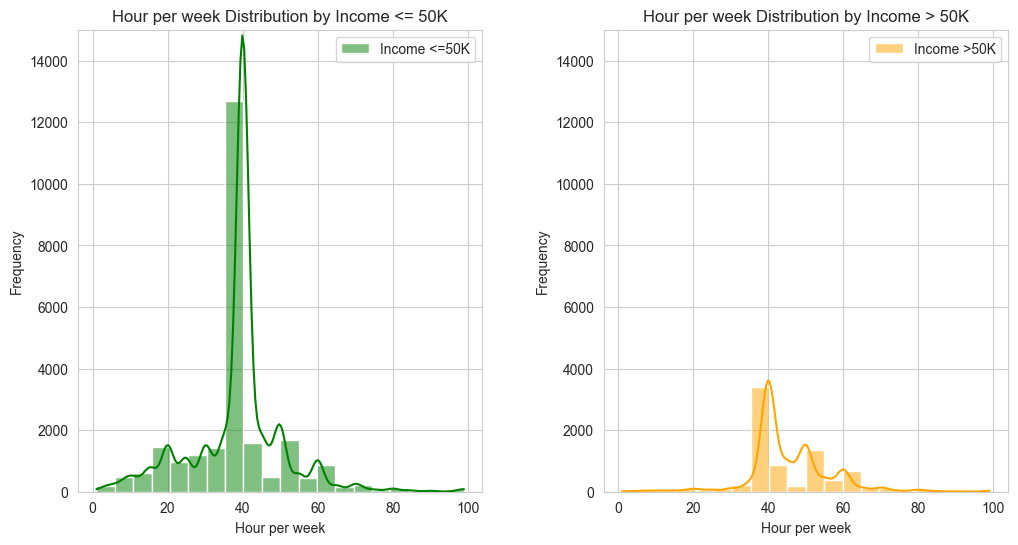

In [7]:
# Subplot 'hour_per_week' & 'income'
# Filter income:
train['income'] = train['income'].str.strip()
income_gt_50k = train[train['income'] == '>50K']
income_le_50k = train[train['income'] == '<=50K']

# Set subplot
sns.set_style("whitegrid")
plt.subplots(figsize=(12, 6))
Grid_plot = plt.GridSpec(1, 2, wspace = 0.3)

# age vs income <= 50K on the left side
plt.subplot(Grid_plot[0, 0])
sns.histplot(income_le_50k['hours_per_week'], bins=20, kde=True, color='green', label='Income <=50K')
plt.title("Hour per week Distribution by Income <= 50K")
plt.ylim(0,15000)
plt.xlabel("Hour per week")
plt.ylabel("Frequency")
plt.legend()

# age vs income > 50K on the right side
plt.subplot(Grid_plot[0, 1])
sns.histplot(income_gt_50k['hours_per_week'], bins=20, kde=True, color='orange', label='Income >50K')
plt.title("Hour per week Distribution by Income > 50K")
plt.ylim(0,15000)
plt.xlabel("Hour per week")
plt.ylabel("Frequency")
plt.legend()

The majority of individuals maintain a 40-hour workweek.

Concerning income, those in the category with an annual income less than or equal to 50K generally work fewer than 40 hours per week. Conversely, individuals with an annual income exceeding 50K typically work more than 40 hours weekly.

A correlation emerges between weekly work hours and income.

### 2.4. The distribution of 'workclass' and the association with the target variable 'income'

<Figure size 640x480 with 0 Axes>

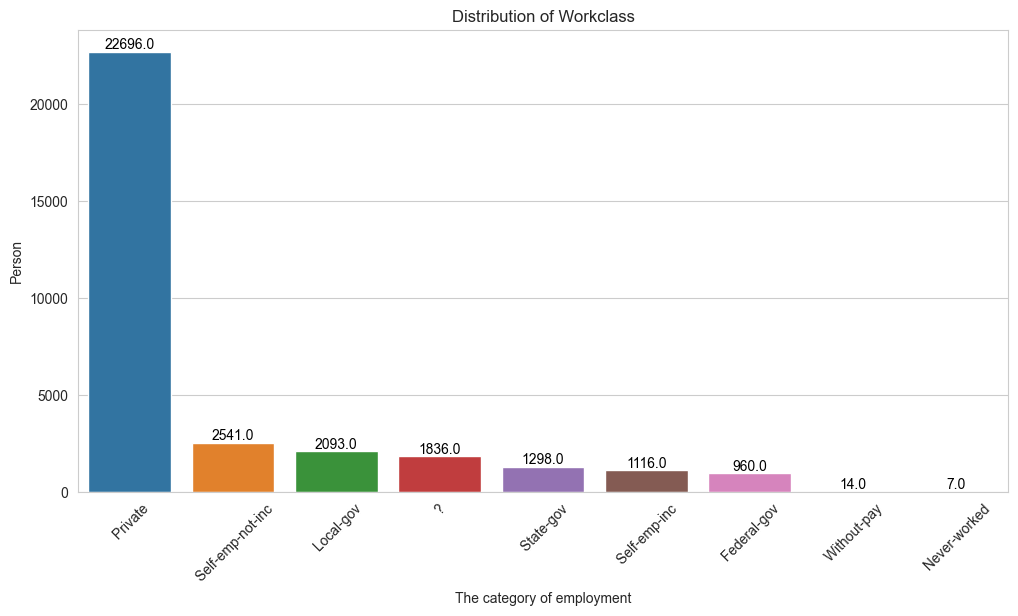

In [8]:
# Plot the distribution of work class:
plt.figure()
sns.set_style("whitegrid")
plt.subplots(figsize=(12, 6))
plot_workclass = sns.countplot(x = train['workclass'], data = train, order= train['workclass'].value_counts().index)
plt.title("Distribution of Workclass")
plt.xlabel("The category of employment")
plt.ylabel("Person")

for p in plot_workclass.patches:
    plot_workclass.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')

plot_workclass.set_xticklabels(plot_workclass.get_xticklabels(), rotation=45)

plt.show()

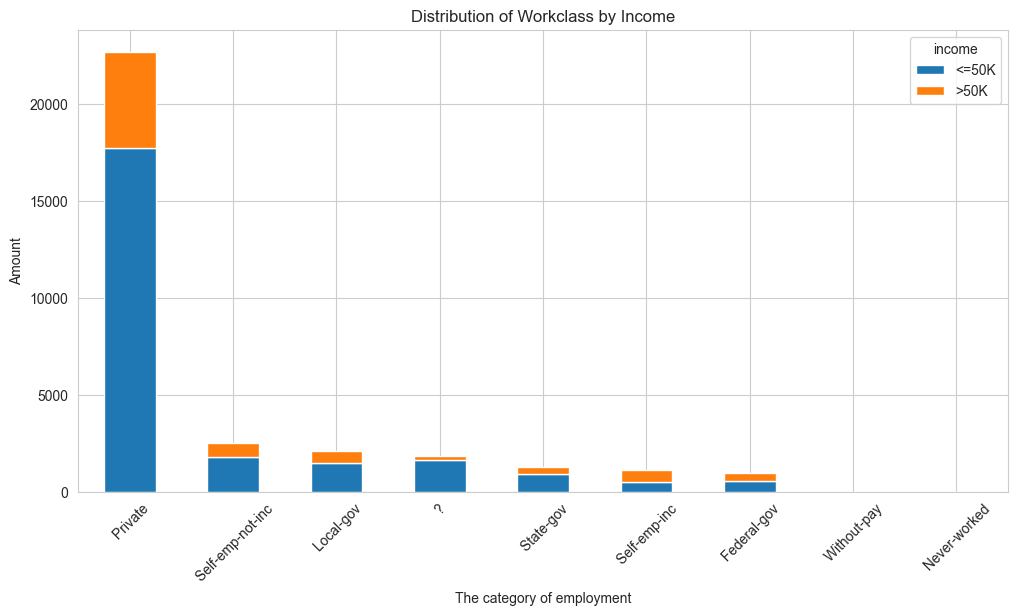

In [9]:
# Plot the distribution of workclass regarding income
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Sortiere die Spalten nach der Summe der Werte in absteigender Reihenfolge
w_i = pd.crosstab(train['workclass'], train['income'])
sorted_order = w_i.sum(axis=1).sort_values(ascending=False).index
w_i = w_i.loc[sorted_order]

# Plot das gestapelte Balkendiagramm
fig1 = w_i.plot(kind="bar", stacked=True, ax=plt.gca())
plt.title("Distribution of Workclass by Income")
plt.xlabel("The category of employment")
plt.ylabel("Amount")
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=45)
plt.show()

The majority of subjects are employed in the private sector.

Regarding income, individuals working in the self-emp-inc sector exhibit a higher proportion of annual incomes exceeding 50K compared to the other groups.

### 2.5. The distribution of 'education' and the association with the target variable 'income'

<Figure size 640x480 with 0 Axes>

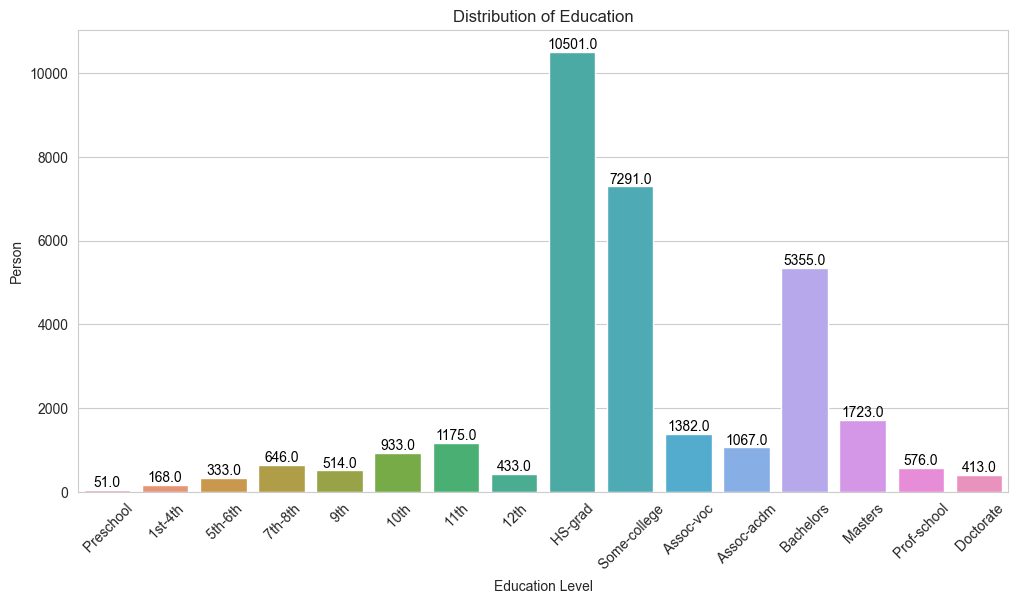

In [10]:
# Plot the distribution of 'education'
plt.figure()
sns.set_style("whitegrid")
plt.subplots(figsize=(12, 6))

plot_edu = sns.countplot(x = train['education_num'], data = train)
plt.title("Distribution of Education")
plt.xlabel("Education Level")
plt.ylabel("Person")

for p in plot_edu.patches:
    plot_edu.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')

plot_edu.set_xticklabels([' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th',
                          ' 11th', ' 12th', ' HS-grad', ' Some-college', ' Assoc-voc',
                          ' Assoc-acdm', ' Bachelors', ' Masters', ' Prof-school', ' Doctorate']
                         , rotation=45)

plt.show()

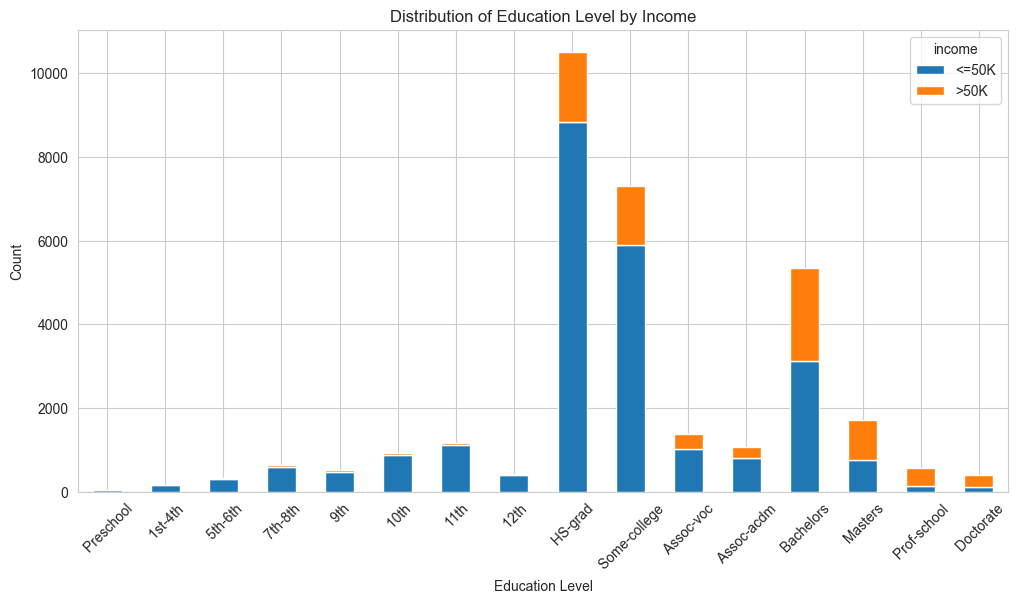

In [11]:
# Prepare the data by creating a crosstab
e_i = pd.crosstab(train['education_num'], train['income'])

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

fig2=e_i.plot(kind="bar", stacked=True, ax=plt.gca())

plt.title("Distribution of Education Level by Income")
plt.xlabel("Education Level")
plt.ylabel("Count")
fig2.set_xticklabels([' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th',
                      ' 11th', ' 12th', ' HS-grad', ' Some-college', ' Assoc-voc',
                      ' Assoc-acdm', ' Bachelors', ' Masters', ' Prof-school', ' Doctorate'], rotation=45)

plt.show()

The majority of subjects have completed high school or attained a higher level of education.

In relation to income, individuals with educational backgrounds including university, master's, doctorate, or higher, exhibit a higher proportion of annual incomes exceeding 50K compared to other educational groups.

A correlation between education level and income is evident.

### 2.6. The distribution of 'marital_status' and the association with the target variable 'income'

<Figure size 640x480 with 0 Axes>

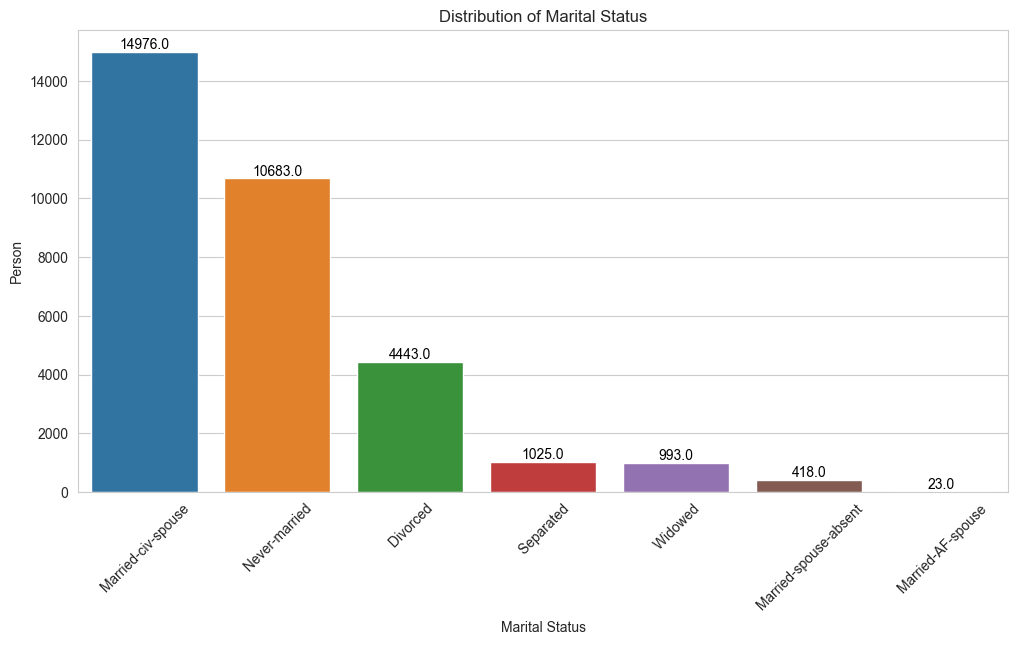

In [12]:
# Plot the distribution of marital status
plt.figure()
sns.set_style("whitegrid")
plt.subplots(figsize=(12, 6))
plot_marital = sns.countplot(x = train['marital_status'], data = train, order= train['marital_status'].value_counts().index)
plt.title("Distribution of Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Person")

for p in plot_marital.patches:
    plot_marital.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                          textcoords='offset points')

plot_marital.set_xticklabels(plot_marital.get_xticklabels(), rotation= 45)

plt.show()

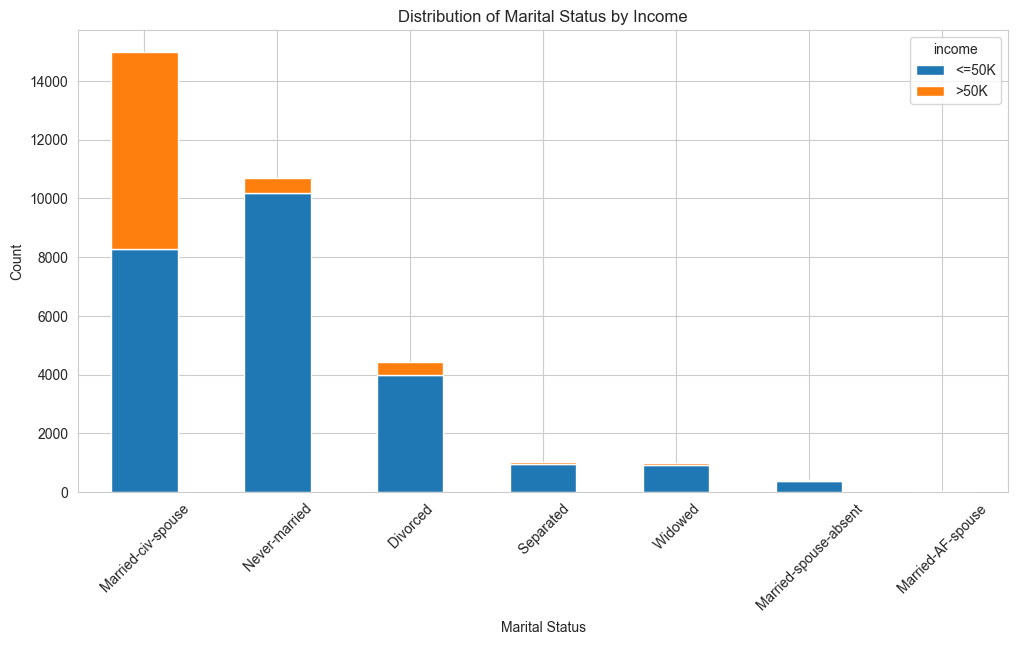

In [13]:
# Prepare the data by creating a crosstab
m_i = pd.crosstab(train['marital_status'], train['income'])
sorted_order = m_i.sum(axis=1).sort_values(ascending=False).index
m_i = m_i.loc[sorted_order]

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

fig3=m_i.plot(kind="bar", stacked=True, ax=plt.gca())

plt.title("Distribution of Marital Status by Income")
plt.xlabel("Marital Status")
plt.ylabel("Count")
fig3.set_xticklabels(fig3.get_xticklabels(), rotation=45)

plt.show()

The majority of respondents in a marital relationship are presently married.

Regarding income, individuals in a marital relationship tend to exhibit a higher percentage of annual incomes exceeding 50K compared to other groups.

### 2.7. The distribution of 'occupation' and the association with the target variable 'income'

<Figure size 640x480 with 0 Axes>

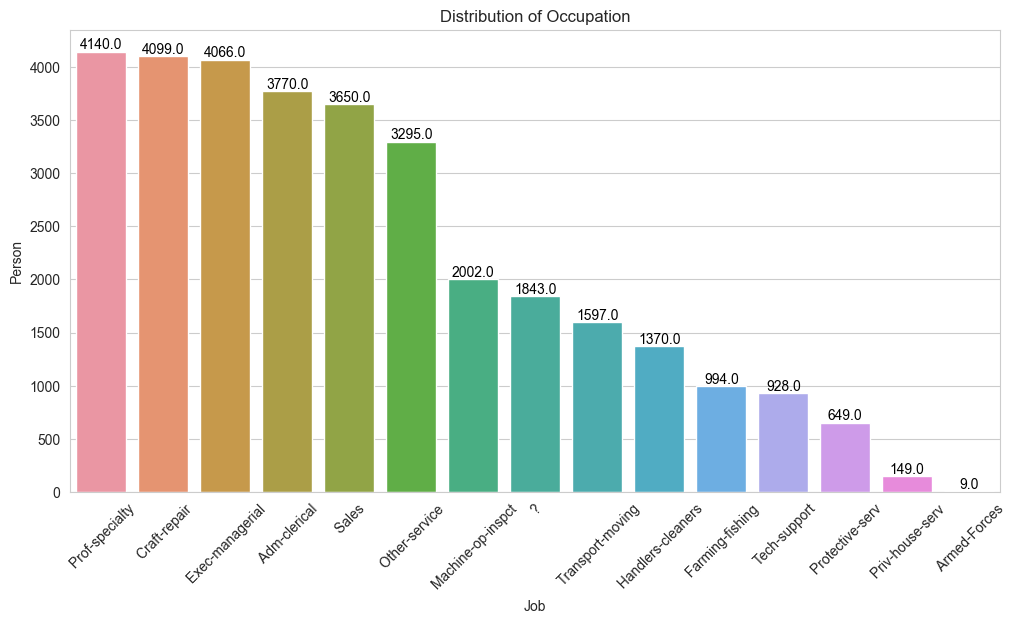

In [14]:
#
plt.figure()
sns.set_style("whitegrid")
plt.subplots(figsize=(12, 6))
plot_job = sns.countplot(x = train['occupation'], data = train, order=train['occupation'].value_counts().index)
plt.title("Distribution of Occupation")
plt.xlabel("Job")
plt.ylabel("Person")

for p in plot_job.patches:
    plot_job.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')

plot_job.set_xticklabels(plot_job.get_xticklabels(), rotation=45)

plt.show()

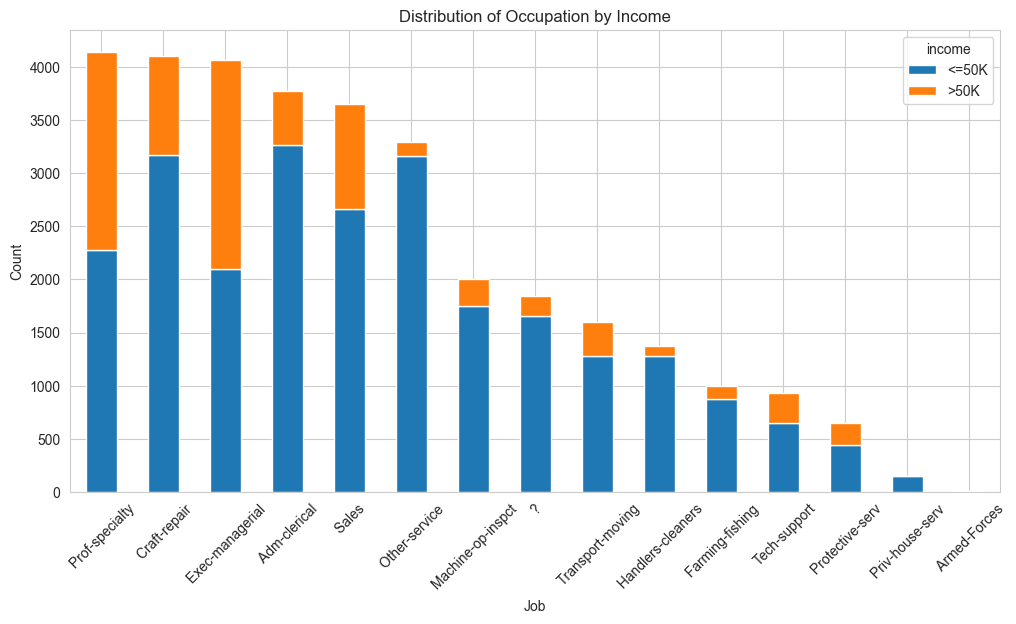

In [15]:
# Prepare the data by creating a crosstab
o_i = pd.crosstab(train['occupation'], train['income'])
sorted_order = o_i.sum(axis=1).sort_values(ascending=False).index
o_i = o_i.loc[sorted_order]

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

fig4=o_i.plot(kind="bar", stacked=True, ax=plt.gca())

plt.title("Distribution of Occupation by Income")
plt.xlabel("Job")
plt.ylabel("Count")
fig4.set_xticklabels(fig4.get_xticklabels(), rotation=45)

plt.show()

Individuals in occupations such as professors, doctors, engineers, and similar professions tend to exhibit a higher likelihood of earning an annual income exceeding 50K compared to other demographic groups.

### 2.8. The distribution of 'relationship' and the association with the target variable 'income'

<Figure size 640x480 with 0 Axes>

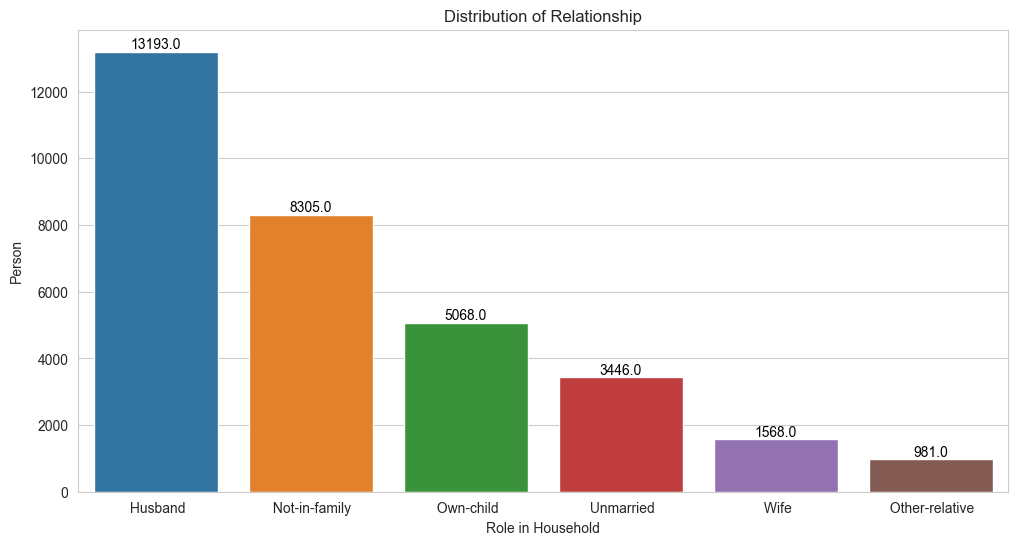

In [16]:
plt.figure()
sns.set_style("whitegrid")
plt.subplots(figsize=(12, 6))
plot_rel = sns.countplot(x = train['relationship'], data = train, order=train['relationship'].value_counts().index)
plt.title("Distribution of Relationship")
plt.xlabel("Role in Household")
plt.ylabel("Person")

for p in plot_rel.patches:
    plot_rel.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')

plt.show()

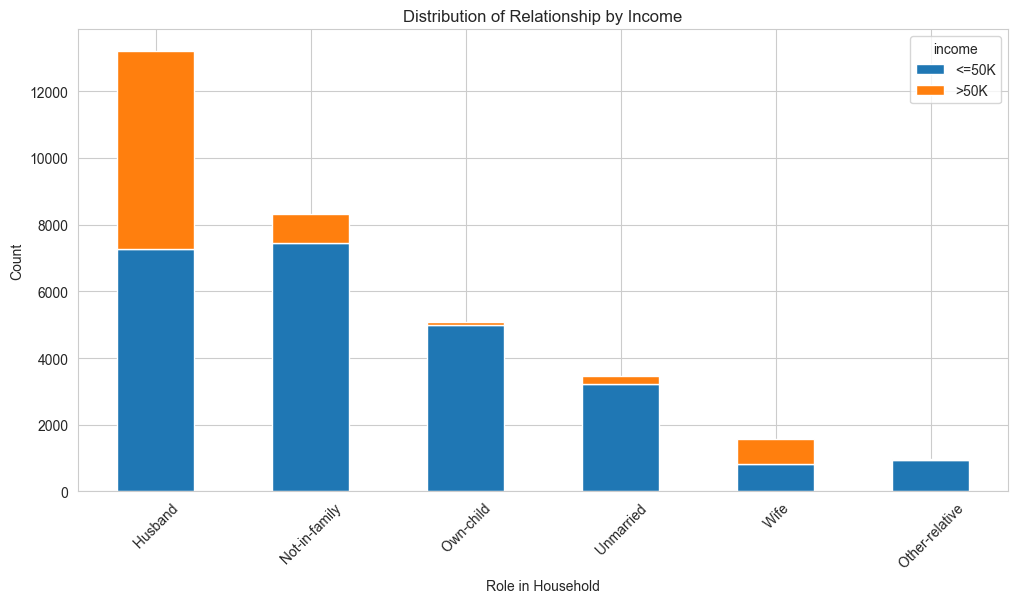

In [17]:
# Prepare the data by creating a crosstab
re_i = pd.crosstab(train['relationship'], train['income'])
sorted_order = re_i.sum(axis=1).sort_values(ascending=False).index
re_i = re_i.loc[sorted_order]
# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

fig5=re_i.plot(kind="bar", stacked=True, ax=plt.gca())
plt.title("Distribution of Relationship by Income")
plt.xlabel("Role in Household")
plt.ylabel("Count")
fig5.set_xticklabels(fig5.get_xticklabels(), rotation=45)

plt.show()

Individuals in the husband or wife role within families tend to exhibit a higher likelihood of earning an annual income exceeding 50K in comparison to other demographic groups.

### 2.9. The distribution of 'sex' and the association with the target variable 'income'

C:\Users\haihu\AppData\Local\Temp\ipykernel_16500\990587071.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(Grid_plot[0, 0])


[Text(0, 0, ' Male'), Text(1, 0, ' Female')]

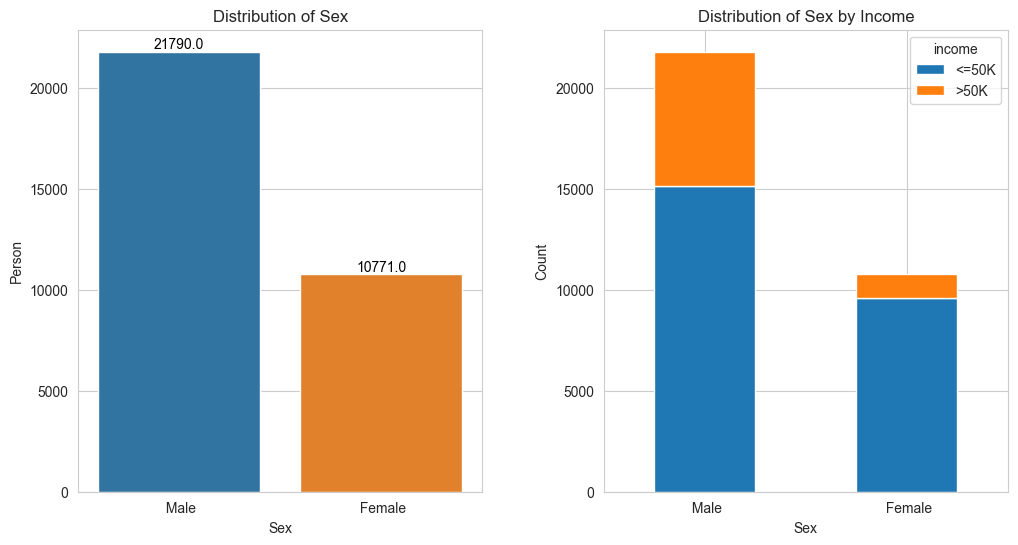

In [18]:
# Subplot distribution of sex & sex by income
# Set subplot
sns.set_style("whitegrid")
plt.subplots(figsize=(12, 6))
Grid_plot = plt.GridSpec(1, 2, wspace = 0.3)

# age vs income <= 50K on the left side
plt.subplot(Grid_plot[0, 0])
plot_sex = sns.countplot(x = train['sex'], data = train, order=train['sex'].value_counts().index)
plt.title("Distribution of Sex")
plt.xlabel("Sex")
plt.ylabel("Person")
for p in plot_sex.patches:
    plot_sex.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')

# age vs income > 50K on the right side
plt.subplot(Grid_plot[0, 1])
sex_i = pd.crosstab(train['sex'], train['income'])
sorted_order = sex_i.sum(axis=1).sort_values(ascending=False).index
sex_i = sex_i.loc[sorted_order]
fig5=sex_i.plot(kind="bar", stacked=True, ax=plt.gca())
plt.title("Distribution of Sex by Income")
plt.xlabel("Sex")
plt.ylabel("Count")
fig5.set_xticklabels(fig5.get_xticklabels(), rotation=0)

Male subjects are expected to exhibit a higher likelihood of attaining an annual income exceeding 50K compared to female subjects.

### 2.10. The distribution of 'race' and the association with the target variable 'income'

<Figure size 640x480 with 0 Axes>

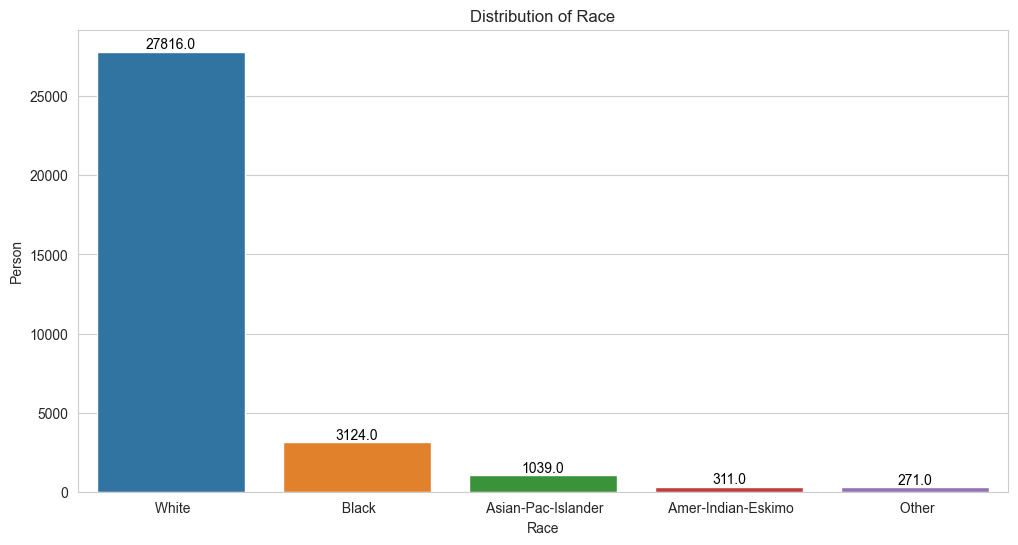

In [19]:
plt.figure()
sns.set_style("whitegrid")
plt.subplots(figsize=(12, 6))
plot_rel = sns.countplot(x = train['race'], data = train, order=train['race'].value_counts().index)
plt.title("Distribution of Race")
plt.xlabel("Race")
plt.ylabel("Person")

for p in plot_rel.patches:
    plot_rel.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')

plt.show()

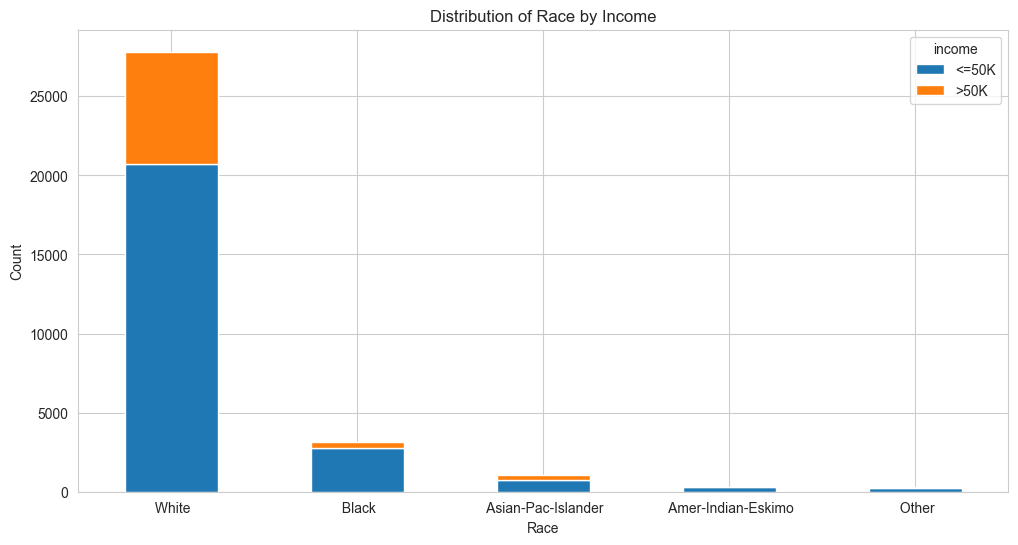

In [20]:
# Prepare the data by creating a crosstab
ra_i = pd.crosstab(train['race'], train['income'])
sorted_order = ra_i.sum(axis=1).sort_values(ascending=False).index
ra_i = ra_i.loc[sorted_order]
# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

fig5=ra_i.plot(kind="bar", stacked=True, ax=plt.gca())
plt.title("Distribution of Race by Income")
plt.xlabel("Race")
plt.ylabel("Count")
fig5.set_xticklabels(fig5.get_xticklabels(), rotation=0)
plt.show()

Individuals of white ethnicity exhibit a higher likelihood of attaining an annual income exceeding 50K compared to individuals from different racial backgrounds.

### 2.11. The distribution of 'native_country'

C:\Users\haihu\AppData\Local\Temp\ipykernel_16500\2583777452.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(Grid_plot[0, 0])


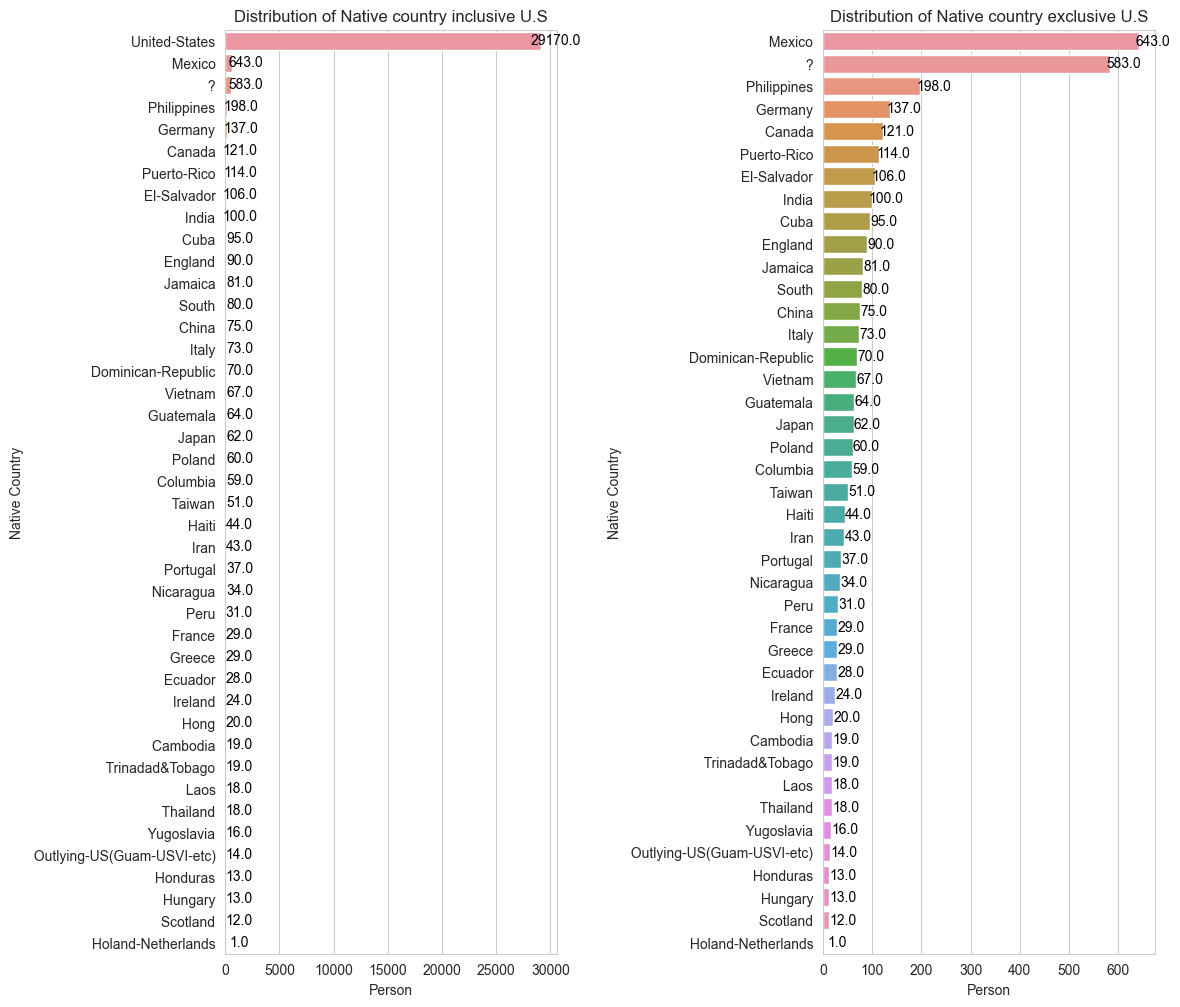

In [21]:
# Subplot distribution of native-country inclusive and exclusive U.S
# Set subplot
sns.set_style("whitegrid")
plt.subplots(figsize=(12, 12))
Grid_plot = plt.GridSpec(1, 2, wspace = 0.8)

# age vs income <= 50K on the left side
plt.subplot(Grid_plot[0, 0])
nav_order = train['native_country'].value_counts().index
plot_nav = sns.countplot(y = train['native_country'], data = train, order=nav_order)
plt.title("Distribution of Native country inclusive U.S")
plt.xlabel("Person")
plt.ylabel("Native Country")

for p in plot_nav.patches:
    plot_nav.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                      ha='center', va='center', fontsize=10, color='black', xytext=(10, 0),
                      textcoords='offset points')

# age vs income > 50K on the right side
plt.subplot(Grid_plot[0, 1])
filtered_us = train[train['native_country'].str.strip() != 'United-States']
filtered_us_order = filtered_us['native_country'].value_counts().index

plot_nav = sns.countplot(y = filtered_us['native_country'], data = filtered_us, order= filtered_us_order)
plt.title("Distribution of Native country exclusive U.S")
plt.xlabel("Person")
plt.ylabel("Native Country")

for p in plot_nav.patches:
    plot_nav.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                      ha='center', va='center', fontsize=10, color='black', xytext=(10, 0),
                      textcoords='offset points')

The chart illustrates that the majority of respondents are of American nationality. The remaining categories represent a minimal portion, and as such, no further analysis will be conducted on these entries.

## 3. Data Processing
<br>

### 3.1. Data Cleaning

In [22]:
# Unique checking:
for x in train:
    unique_values = train[x].unique()
    print(f'Unique values of "{x}": "{unique_values}"')

Unique values of "age": "[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]"
Unique values of "workclass": "[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']"
Unique values of "fnlwgt": "[ 77516  83311 215646 ...  34066  84661 257302]"
Unique values of "education": "[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']"
Unique values of "education_num": "[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]"
Unique values of "marital_status": "[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']"
Unique values of "occupation": "[' Adm-clerical'

The integer variables in this DataFrame can be used seamlessly. However, the categorical objects such as **'workclass'**, **'education'**, and others are not consistently formatted; some values contain unnecessary **spaces**. Therefore, a data cleaning step is required to handle and standardize these categorical variables.

Additionally, there are missing values represented as question marks **'?'** within the dataset. These missing values must be addressed before proceeding with any further data analysis or modeling steps

In [23]:
# Space striping:
train_1 = train.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
test_1 = test.apply(lambda y: y.str.strip() if y.dtype == 'object' else y)

# Unique checking:
for x in train_1:
    unique_values = train_1[x].unique()
    print(f'Unique values of "{x}": "{unique_values}"')

for y in test_1:
    unique_values = test_1[y].unique()
    print(f'Unique values of "{y}": "{unique_values}"')    

Unique values of "age": "[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]"
Unique values of "workclass": "['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']"
Unique values of "fnlwgt": "[ 77516  83311 215646 ...  34066  84661 257302]"
Unique values of "education": "['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']"
Unique values of "education_num": "[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]"
Unique values of "marital_status": "['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']"
Unique values of "occupation": "['Adm-clerical' 'Exec-managerial' 'Handlers-clea

### 3.2. Missing Data Processing

Missing values exist in categorical features such as **'workclass'**, **'occupation'**, and **'native_country'**. 

The reasons for these missing values are currently unclear. Additionally, the missing values collectively account for only a small percentage of the dataset. 

For instance, the **'workclass'** variable has 1836 missing values out of 32561 observations, which is approximately 5% of the data. 

Consequently, the decision has been made to remove these missing values.

In [24]:
#Check NA/Missing Values in form of '?':
missing_values_train = (train_1 == '?').sum()
print(missing_values_train)

missing_values_test = (test_1 == '?').sum()
print(missing_values_test)

#Drop NA on train and test set
train_1 = train_1.replace('?', np.nan).dropna()
test_1 = test_1.replace('?', np.nan).dropna()
print(train_1.isna().sum())
print(test_1.isna().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64
age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0

In [25]:
# Check duplicated values in train_1 and test_1:
duplicated_values_train = train_1.duplicated().sum()
print(duplicated_values_train)

duplicated_values_test = test_1.duplicated().sum()
print(duplicated_values_test)

# Drop duplicated values on train and test set, keep the first one. And then check again, if there are any duplicated values.
train_1.drop_duplicates(keep='first', inplace=True)
test_1.drop_duplicates(keep='first', inplace=True)

# Now, check the number of duplicated values again after dropping them.
duplicated_values_train_after_drop = train_1.duplicated().sum()
duplicated_values_test_after_drop = test_1.duplicated().sum()

print(duplicated_values_train_after_drop)
print(duplicated_values_test_after_drop)


23
5
0
0


In [36]:
# Shape of DataFrame checking:
print(train_1.shape[0])
print(test_1.shape[0])

30139
15055


## 4. Feature Engineering
<br>

### 4.1. Feature Elimination

In this DataFrame, there are some irrelevant features concerning the target variable. Therefore, these features need to be dropped.
- The feature **'fnlwgt'** is the serial number.
- The feature **'education_num'** relates to the ordinal level of **'education'**.
- The last two features **'race'** and **'native_country'**, as discussed in the first section, suffer from issues related to imbalanced values. If retained, they might impact the model's predictive performance.

In [26]:
# Drop 'fnlwgt', 'education_num', 'race', 'native_country' on train set --> train_1
train_1.drop(['fnlwgt','education_num','race','native_country'], axis=1, inplace=True)
# Drop 'fnlwgt', 'education_num', 'race', 'native_country' on test set --> test_1
test_1.drop(['fnlwgt','education_num','race','native_country'], axis=1, inplace=True)

### 4.2. Label Encoding

Some categorical features need to be encoded as binary, such as **'sex'** and **'income'**, to make them usable in the model.

In [27]:
# Encoding 'sex'
train_1['sex'] = train_1['sex'].map({'Male':0, 'Female':1}).astype(int)
test_1['sex'] = test_1['sex'].map({'Male':0, 'Female':1}).astype(int)

# Encoding 'income'
train_1['income'] = train_1['income'].map({'<=50K':0, '>50K':1}).astype(int)
test_1['income'] = test_1['income'].map({'<=50K.':0, '>50K.':1}).astype(int)

### 4.3. One-hot Encoding

The remaining categorical features with a larger number of unique values should be encoded using a one-hot-encoding technique.

Following encoding, each original feature will be replaced by a set of new features, with each unique value in the original feature corresponding to its own separate new feature. These new features will have binary values, 0 and 1.

In [28]:
# One-hot encode 'workclass', 'education', 'marital-status', 'occupation' and, 'relationship'.
train_1 = pd.get_dummies(train_1, columns=['workclass', 'education', 'marital_status', 'occupation', 'relationship'], drop_first=True)
test_1 = pd.get_dummies(test_1, columns=['workclass', 'education', 'marital_status', 'occupation', 'relationship'], drop_first=True)

After dropping irrelevant features and encoding the categorical features. The DataFrame have 51 features now.

In [29]:
# Show train and test set after encoding
train_1.info()
test_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 51 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   30139 non-null  int64
 1   sex                                   30139 non-null  int32
 2   capital_gain                          30139 non-null  int64
 3   capital_loss                          30139 non-null  int64
 4   hours_per_week                        30139 non-null  int64
 5   income                                30139 non-null  int32
 6   workclass_Local-gov                   30139 non-null  bool 
 7   workclass_Private                     30139 non-null  bool 
 8   workclass_Self-emp-inc                30139 non-null  bool 
 9   workclass_Self-emp-not-inc            30139 non-null  bool 
 10  workclass_State-gov                   30139 non-null  bool 
 11  workclass_Without-pay                 30139 no

## 5. Model Training & Verification
<br>

### 5.1. Logistic Regression Model & Evaluation

In [30]:
#Selecting features and target variable from train set
features_train = train_1.drop('income',axis=1)
target_train = train_1['income']

#Selecting features and target variable from test set
features_test = test_1.drop('income',axis=1)
target_test = test_1['income']

#Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(features_train, target_train)

#Predictions on the validation set
target_pred = logistic_model.predict(features_test)

#Evaluate the model
accuracy = accuracy_score(target_test, target_pred)
conf_matrix = confusion_matrix(target_test, target_pred)
class_report = classification_report(target_test, target_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

0.8451012952507473
[[10551   804]
 [ 1528  2172]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11355
           1       0.73      0.59      0.65      3700

    accuracy                           0.85     15055
   macro avg       0.80      0.76      0.78     15055
weighted avg       0.84      0.85      0.84     15055


C:\Users\haihu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Model Evaluation Metrics:**

**Accuracy:** Approximately 84.66%

**Confusion Matrix:**
- 10514 True Negatives
- 2236 True Positives
- 846 False Positives
- 1464 False Negatives

**Classification Report**
For class 0 (income <= 50K), the model has a precision of 0.88 and a recall of 0.93.
For class 1 (income > 50K), the model has a precision of 0.73 and a recall of 0.60

<br>

The model accurately predicts the outcome for 84.66% of the input samples. 

In this case, it makes correct predictions for 10,514 individuals with an annual income of 50K or less and 2,236 individuals with an annual income exceeding 50K. 

However, the model also makes incorrect predictions for 846 individuals, categorizing them as earning over 50K when their actual income is below that threshold. Additionally, it incorrectly predicts 1,464 individuals to have incomes below 50K when they earn more than 50K.

For class 0, the model demonstrates both high precision and recall, indicating strong performance. Conversely, for class 1, the model exhibits lower precision and recall, suggesting room for improvement in its predictive accuracy.

### 5.2. Random Forest Classifier & Feature Importances

Now, another model will be tested to observe potential differences. The model of choice for this trial is the random forest model.

In [31]:
# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(features_train, target_train)
rfm_target_pred = random_forest_model.predict(features_test)

# Get feature importances from the Random Forest model
feature_importances_rf = random_forest_model.feature_importances_

# Create a DataFrame to hold feature names and their corresponding importances
feature_importance_rf_df = pd.DataFrame({
    'Feature': features_train.columns,
    'Importance': feature_importances_rf
})

# Sort the DataFrame by the importances
feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

print(classification_report(target_test, rfm_target_pred))
print(feature_importance_rf_df.head(5))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11355
           1       0.69      0.61      0.65      3700

    accuracy                           0.84     15055
   macro avg       0.79      0.76      0.77     15055
weighted avg       0.83      0.84      0.84     15055

                              Feature  Importance
0                                 age    0.248883
4                      hours_per_week    0.122853
2                        capital_gain    0.120312
27  marital_status_Married-civ-spouse    0.096170
3                        capital_loss    0.041602


The results reveal that the random forest model exhibits a performance comparable to that of the logistic model, with only a slight decrease in performance, specifically a 1% reduction in the f1-score. 

However, it demonstrates an improvement in recall by 1%, signifying its better ability to predict class 1 accurately when compared to the logistic model.

Now, let's identify the top 5 features that significantly influence annual income.

1. **'age'**: This feature makes sense because, as observed in the exploratory data analysis section, the majority of individuals with an annual income exceeding 50K fall within the age range of 40-60. Conversely, those in the 17-30 age group exhibit a lower likelihood of having an annual income exceeding 50K.
2. **'hours_per_week'**: There is a clear correlation between the number of working hours and income. The more hours an individual works, the higher their income tends to be.
3. **'capital_gain'**: The 'capital_gain' feature represents the profits an individual gains from investment activities. It follows that when they earn significant profits, the probability of their having an annual income higher than 50K also increases.
4. **'marital_status_Married_civ_spuse'**: Marital status, specifically being married, is associated with a higher probability of having an annual income exceeding 50K. Potential reasons for this could include shared accommodation expenses and living costs among married couples.
5. **'capital_loss'**: Similar to 'capital_gain,' 'capital_loss' plays a significant role in predicting annual income. When an individual experiences financial losses from investments, this can significantly impact their annual income.

### 5.3. Data Imbalanced and SMOTE Applying

The dataset exhibits an imbalance, evident in the disproportional distribution of observations in the 'income' feature. 

Consequently, implementing oversampling may serve to rectify this imbalance.

By creating a balanced dataset, the objective is to assess whether predictive performance can be improved compared to using the imbalanced dataset.

In [32]:
# Initialize SMOTE and perform oversampling
smote = SMOTE(random_state=42)
features_train_balanced, target_train_balanced = smote.fit_resample(features_train, target_train)
features_test_balanced, target_test_balanced =smote.fit_resample(features_test, target_test)

# Check the new class distribution after oversampling
train_balanced_distribution = pd.Series(target_train_balanced).value_counts(normalize=True) * 100
print(train_balanced_distribution)

# Check the new class distribution after oversampling
test_balanced_distribution = pd.Series(target_test_balanced).value_counts(normalize=True) * 100
print(test_balanced_distribution)

income
0    50.0
1    50.0
Name: proportion, dtype: float64
income
0    50.0
1    50.0
Name: proportion, dtype: float64


In [33]:
random_forest_model.fit(features_train_balanced, target_train_balanced)

target_balanced_pred = random_forest_model.predict(features_test_balanced)

accuracy = accuracy_score(target_test_balanced, target_balanced_pred)
conf_matrix = confusion_matrix(target_test_balanced, target_balanced_pred)
class_report = classification_report(target_test_balanced, target_balanced_pred)
print(accuracy)
print(conf_matrix)
print(class_report)

0.7650814619110524
[[9992 1363]
 [3972 7383]]
              precision    recall  f1-score   support

           0       0.72      0.88      0.79     11355
           1       0.84      0.65      0.73     11355

    accuracy                           0.77     22710
   macro avg       0.78      0.77      0.76     22710
weighted avg       0.78      0.77      0.76     22710


**Model Evaluation Metrics:**

**Accuracy:** Approximately 76.31%

**Confusion Matrix:**
- 9965 True Negatives --> correctly predicted income <= 50K
- 7374 True Positives --> correctly predicted income > 50K
- 1395 False Positives --> incorrectly predicted income > 50K
- 3986 False Negatives --> incorrectly predicted income <= 50K

**Classification Report**
For class 0 (income <= 50K), the model has a precision of 0.71 and a recall of 0.88.
For class 1 (income > 50K), the model has a precision of 0.84 and a recall of 0.65.

Although the model demonstrates lower accuracy, there is an observable improvement in predicting individuals with an annual income exceeding 50K. 

The F1-score has increased from 65% to 73%, indicating a more precise prediction of individuals with annual incomes higher than 50K.